<a href="https://colab.research.google.com/github/Lakshaykumarr28/Prasunet_ML_01/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Lakshaykumarr28/Prasunet_ML_01

Cloning into 'Prasunet_ML_01'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (10/10), 206.70 KiB | 3.08 MiB/s, done.
Resolving deltas: 100% (1/1), done.


Importing all the necessary libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

Reading the Training and Testing data

In [4]:
training_data = pd.read_csv("/content/Prasunet_ML_01/Dataset_ML_01/train.csv")
testing_data = pd.read_csv("/content/Prasunet_ML_01/Dataset_ML_01/test.csv")

# Exploring the Dataset

Printing information about the columns

In [7]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Describing the data

In [5]:
training_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data Preprocessing

Finding the columns with NULL values

In [11]:
null_values = training_data.isnull().sum()

Handling the Columns with NULL values

In [10]:
null_columns = training_data.columns[training_data.isnull().any()]

print("NULL columns are:")
for col in null_columns:
  print(col)

NULL columns are:
LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


Printing the number of NULL values in null_columns

In [13]:
print("The columns with number of NULL or Missing values are:")
null_columns = null_values[null_values > 0]
print(null_columns)

The columns with number of NULL or Missing values are:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Checking if there are duplicate rows and deleting (if any)

In [15]:
repeating_rows = training_data.duplicated().sum()
print(f"number of duplicated rows are: {repeating_rows}")
training_data.drop_duplicates(inplace = True)

number of duplicated rows are: 0


# Selecting Columns as Features for Training and Testing

In [17]:
features = training_data[['TotalBsmtSF', 'BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']]
target = training_data[['SalePrice']]


Splitting the Dataset for Training and Testing

In [20]:
X = training_data[['TotalBsmtSF', 'BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath',"FullBath", "HalfBath"]]
y = training_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Creating a dataframe with only selected features and target

In [23]:
df = pd.concat([features, target], axis = 1)
df.head()

,TotalBsmtSF,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,SalePrice
0,856,3,1,0,2,1,208500
1,1262,3,0,1,2,0,181500
2,920,3,1,0,2,1,223500
3,756,3,1,0,1,0,140000
4,1145,4,1,0,2,1,250000


Creating a Correlation Matrix and plotting a heatmap for the same

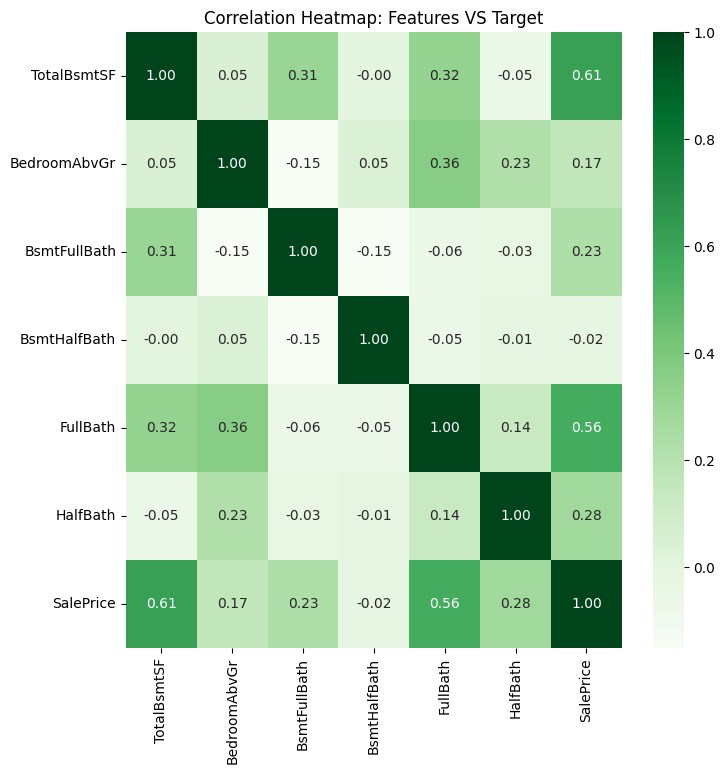

In [28]:
# the correlation matrix
correlation_matrix = df.corr()

# heatmap for the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title("Correlation Heatmap: Features VS Target")
plt.show()

Checking for Missing values in the selected features

In [29]:
missing_values = X.isnull().sum()
print(missing_values)

TotalBsmtSF     0
BedroomAbvGr    0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
dtype: int64


# The Linear Regression Model

In [31]:
model = LinearRegression()

Fitting the model

In [32]:
model.fit(X_train, y_train)
print(model)

LinearRegression()


Predicting on the Testing data

In [36]:
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_pred, y_test)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 2693215363.503077


Printing Cross Validation Scores

In [42]:
scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-Validation Scores: {scores}')
print(f'Mean CV Score: {scores.mean()}')

Cross-Validation Scores: [0.60009438 0.65556307 0.63763301 0.61946238 0.44203474]
Mean CV Score: 0.5909575152454488


Plotting Actual VS Predicted Prices

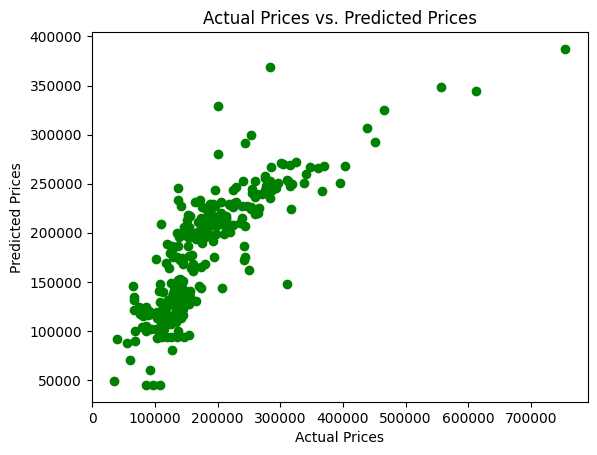

In [44]:
plt.scatter(y_test, y_pred, c='Green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

Taking a demo new house to predict the price

In [45]:
demo_house = np.array([[1500, 4, 2,0,3,1]])
predicted_price = model.predict(demo_house)
print(f"Predicted Price for the New House: ${predicted_price[0]:.2f}")

Predicted Price for the New House: $345983.63


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
